# Program Assignment 1 Machine Learning
Micheila Jiemesha - 0706012110032 & Hans Joachim W - 0706012110008

# 1. Problem and Task Understanding

Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.

We are given a dataset of student grades originating from different schools. The data collected ranges from the gender and age of the student to their frequency of absences alongside their grades. As the data we're going to predict is continuous, we will use regression to solve our problem of predicting the final grade (G3) of the students. 

To test our results, we will predict the final grade of a subject with the following details:
    a female, 
    19 y/o student,
    from Gabriel Pereira,
    living in an urban area,
    with a family of greater than 3 members (including the subject),
    both parents are living together, 
    both parents have higher education, 
    both work in civil services,
    subject's reason of her school decision is its close distance from home,
    subject's main guardian is be her father,
    subject's travel time is be <15 minutes,
    subject's study time is <2 hours,
    0 past class failures,
    no extra educational support,
    no family educational support,
    no extra paid classes,
    joins extra-curricular activities,
    attended nursery school,
    wants to take higher education,
    has internet access at home,
    no romantic relationships,
    decent (3) family relationship,
    very high free amount of free time,
    decent rate of nightouts with friends,
    very low workday alcohol consumption,
    very high weekend alcohol consumption,
    decent (3) health,
    no absences,
    a G1 score of 17,
    and, lastly, a G2 score of 18.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


### Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/HansJoachimW/AFL1-MachineLearning/main/Student%20Grade%20-%20Dataset.csv"
dataset = pd.read_csv(url)
dataset.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
268,GP,M,18,U,GT3,T,4,2,health,other,...,5,4,5,1,3,5,10,10,9,10
259,GP,F,17,U,LE3,T,2,2,services,services,...,3,4,1,1,1,2,0,10,9,0
274,GP,F,17,U,GT3,T,2,4,at_home,health,...,4,3,3,1,1,1,2,10,10,10
139,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,4,3,2,1,1,5,0,16,16,15
261,GP,M,18,U,GT3,T,4,3,teacher,other,...,4,3,2,1,1,3,2,8,8,8
172,GP,M,17,U,LE3,T,4,4,teacher,other,...,4,4,4,1,3,5,0,13,11,10
190,GP,F,16,U,GT3,T,2,3,services,services,...,4,3,3,1,1,2,10,11,12,13
340,GP,F,19,U,GT3,T,2,1,services,services,...,4,3,4,1,3,3,4,11,12,11
288,GP,M,18,U,GT3,T,2,1,services,services,...,4,2,4,1,3,2,6,15,14,14
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8


# 2. Preprocessing Data

Since there are some data that's still in string and binary format, we decided to use LabelEncoder to convert those string and binaries to int so we can visualize and process the data.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['school'] = le.fit_transform(dataset['school'].values)
dataset['sex'] = le.fit_transform(dataset['sex'].values)
dataset['address'] = le.fit_transform(dataset['address'].values)
dataset['famsize'] = le.fit_transform(dataset['famsize'].values)
dataset['Pstatus'] = le.fit_transform(dataset['Pstatus'].values)
dataset['Mjob'] = le.fit_transform(dataset['Mjob'].values)
dataset['Fjob'] = le.fit_transform(dataset['Fjob'].values)
dataset['reason'] = le.fit_transform(dataset['reason'].values)
dataset['guardian'] = le.fit_transform(dataset['guardian'].values)
dataset['schoolsup'] = le.fit_transform(dataset['schoolsup'].values)
dataset['famsup'] = le.fit_transform(dataset['famsup'].values)
dataset['paid'] = le.fit_transform(dataset['paid'].values)
dataset['activities'] = le.fit_transform(dataset['activities'].values)
dataset['nursery'] = le.fit_transform(dataset['nursery'].values)
dataset['higher'] = le.fit_transform(dataset['higher'].values)
dataset['internet'] = le.fit_transform(dataset['internet'].values)
dataset['romantic'] = le.fit_transform(dataset['romantic'].values)

dataset.head(n=10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,14,15,15


### Checking NaN Data

Here we're making sure that there are no NaN (Not a Number) datas left in the dataset

In [4]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Deciding The Independent And Dependent Variable

In [5]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi Y adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

### Split The Dataset To Training Data dan Test Data
Train test split is a model validation process that allows you to simulate how your model would perform with new data.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Scaling
We can see from the boxplot that the scales of some of the data are different, so we're going to use Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 3. Data Analysis

### Exploratory Data Analysis (Univariate)

Display the Univariate Data Characteristics

In [8]:
dataset.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Display Graphical Univariate EDA using box plot to analyze data distribution

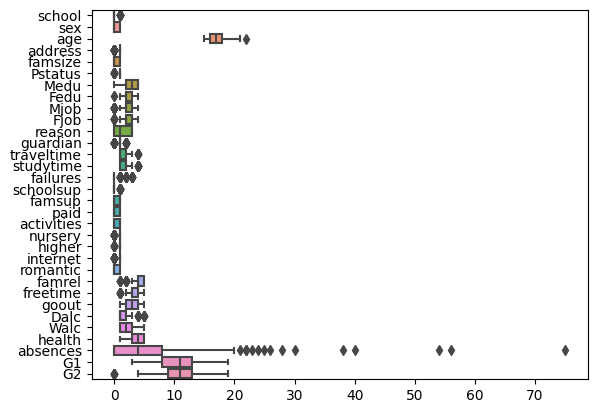

In [9]:
sns.boxplot(data=dataset.drop(columns=['G3']), orient='h')
plt.show()

Display a separate boxplot for 'G3'

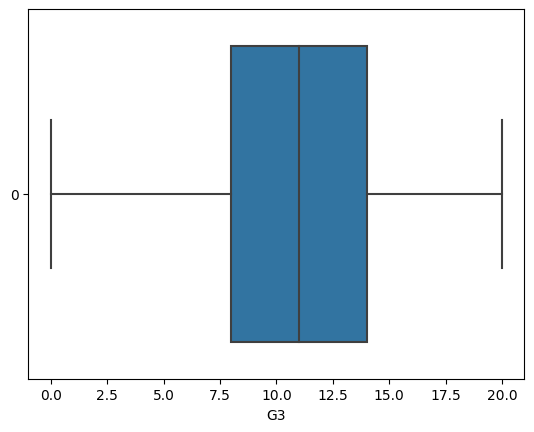

In [10]:
sns.boxplot(data=dataset["G3"],orient="h")
plt.xlabel('G3')
plt.show()

### Exploratory Data Analysis (Multivariate)

Display the Multivariate EDA using pair plot

In [11]:
sns.pairplot(data=dataset, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

Display the correlation strength and direction using heatmap

In [12]:
plt.subplots(figsize=(17,15))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

# 4. Model Generation

We used 5 types of Regression Analysis to find the most optimal one

# Multiple Linear Regression

### Create The Regression Model Based On The Training Data

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("Intercept: {:0.4f}".format(regressor.intercept_))
print("Coefficient b1: {:0.4f}".format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}".format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))
print("Coefficient b6: {:0.4f}".format(regressor.coef_[5]))
print("Coefficient b7: {:0.4f}".format(regressor.coef_[6]))
print("Coefficient b8: {:0.4f}".format(regressor.coef_[7]))
print("Coefficient b9: {:0.4f}".format(regressor.coef_[8]))
print("Coefficient b10: {:0.4f}".format(regressor.coef_[9]))
print("Coefficient b11: {:0.4f}".format(regressor.coef_[10]))
print("Coefficient b12: {:0.4f}".format(regressor.coef_[11]))
print("Coefficient b13: {:0.4f}".format(regressor.coef_[12]))
print("Coefficient b14: {:0.4f}".format(regressor.coef_[13]))
print("Coefficient b15: {:0.4f}".format(regressor.coef_[14]))
print("Coefficient b16: {:0.4f}".format(regressor.coef_[15]))
print("Coefficient b17: {:0.4f}".format(regressor.coef_[16]))
print("Coefficient b18: {:0.4f}".format(regressor.coef_[17]))
print("Coefficient b19: {:0.4f}".format(regressor.coef_[18]))
print("Coefficient b20: {:0.4f}".format(regressor.coef_[19]))
print("Coefficient b21: {:0.4f}".format(regressor.coef_[20]))
print("Coefficient b22: {:0.4f}".format(regressor.coef_[21]))
print("Coefficient b23: {:0.4f}".format(regressor.coef_[22]))
print("Coefficient b24: {:0.4f}".format(regressor.coef_[23]))
print("Coefficient b25: {:0.4f}".format(regressor.coef_[24]))
print("Coefficient b26: {:0.4f}".format(regressor.coef_[25]))
print("Coefficient b27: {:0.4f}".format(regressor.coef_[26]))
print("Coefficient b28: {:0.4f}".format(regressor.coef_[27]))
print("Coefficient b29: {:0.4f}".format(regressor.coef_[28]))
print("Coefficient b30: {:0.4f}".format(regressor.coef_[29]))
print("Coefficient b31: {:0.4f}".format(regressor.coef_[30]))
print("Coefficient b32: {:0.4f}".format(regressor.coef_[31]))

print('\nRegression Equation: y= {:0.4f} X1 + {:0.4f} X2 + {:0.4f} X3 + {:0.4f} X4 + {:0.4f} X5 + {:0.4f} X6 + {:0.4f} X7 + {:0.4f} X8 + {:0.4f} X9 + {:0.4f} X10 + {:0.4f} X11 + {:0.4f} X12 + {:0.4f} X13 + {:0.4f} X14 + {:0.4f} X15 + {:0.4f} X16 + {:0.4f} X17 + {:0.4f} X18 + {:0.4f} X19 + {:0.4f} X20 + {:0.4f} X21 + {:0.4f} X22 + {:0.4f} X23 + {:0.4f} X24 + {:0.4f} X25 + {:0.4f} X26 + {:0.4f} X27 + {:0.4f} X28 + {:0.4f} X29 + {:0.4f} X30 + {:0.4f} X31 + {:0.4f} X32'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], regressor.coef_[6], regressor.coef_[7], regressor.coef_[8], regressor.coef_[9], regressor.coef_[10], regressor.coef_[11], regressor.coef_[12], regressor.coef_[13], regressor.coef_[14], regressor.coef_[15], regressor.coef_[16], regressor.coef_[17], regressor.coef_[18], regressor.coef_[19], regressor.coef_[20], regressor.coef_[21], regressor.coef_[22], regressor.coef_[23], regressor.coef_[24], regressor.coef_[25], regressor.coef_[26], regressor.coef_[27], regressor.coef_[28], regressor.coef_[29], regressor.coef_[30], regressor.coef_[31], regressor.intercept_))

r_square = regressor.score(X_train, y_train)
print('\nThe Coefficient of Determination: {:0.4f}'.format(r_square))

Intercept: 10.4747
Coefficient b1: 0.2049
Coefficient b2: 0.1036
Coefficient b3: -0.3307
Coefficient b4: 0.0136
Coefficient b5: 0.0857
Coefficient b6: -0.0347
Coefficient b7: 0.1938
Coefficient b8: -0.2280
Coefficient b9: -0.0200
Coefficient b10: 0.0452
Coefficient b11: -0.0231
Coefficient b12: -0.0077
Coefficient b13: 0.0252
Coefficient b14: 0.0255
Coefficient b15: -0.1478
Coefficient b16: 0.1992
Coefficient b17: 0.0464
Coefficient b18: 0.1057
Coefficient b19: -0.1765
Coefficient b20: -0.1268
Coefficient b21: 0.0404
Coefficient b22: -0.1032
Coefficient b23: -0.1333
Coefficient b24: 0.2167
Coefficient b25: -0.0237
Coefficient b26: 0.0048
Coefficient b27: -0.1701
Coefficient b28: 0.1710
Coefficient b29: 0.1612
Coefficient b30: 0.4659
Coefficient b31: 0.4538
Coefficient b32: 3.5714

Regression Equation: y= 0.2049 X1 + 0.1036 X2 + -0.3307 X3 + 0.0136 X4 + 0.0857 X5 + -0.0347 X6 + 0.1938 X7 + -0.2280 X8 + -0.0200 X9 + 0.0452 X10 + -0.0231 X11 + -0.0077 X12 + 0.0252 X13 + 0.0255 X14 + -0.14

### Test The Predicted Value Using Test Data

In [14]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
0,14,14.243208
1,10,10.675614
2,9,9.151399
3,15,15.251887
4,16,16.491889


### Evaluating the Model Fit using RMSE, MAE, and MSE

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.3760
MAE: 1.55
MSE: 5.65


Visualize the comparison between y_test and y_pred to depict the error margin

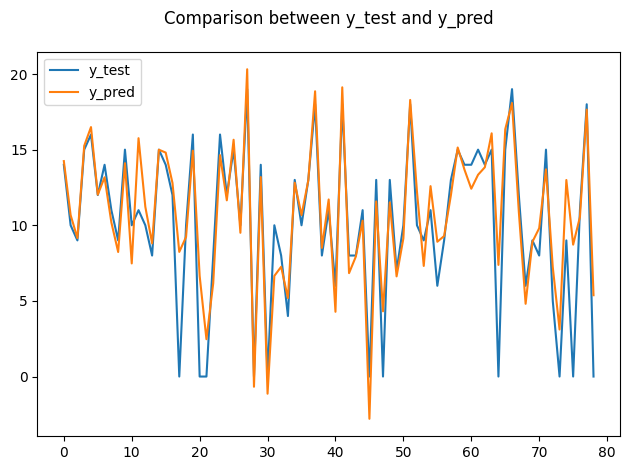

In [16]:
evaluate.plot(kind='line')
plt.title('Comparison between y_test and y_pred', pad=20)
plt.tight_layout()
plt.show()

# Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

## 2 Degree

### Training Process

Get coefficients and intercepts for the Two Degree Polynomial Regression

In [18]:
# Two Degree Polynomial
poly = PolynomialFeatures(degree = 2)
train_x_poly2 = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
train_y_poly2 = clf.fit(train_x_poly2, y_train)

# Get coefficients and intercepts
print('Coefficients:', clf.coef_)
print('Intercepts:', clf.intercept_)


Coefficients: [-1.26299108e-03  3.85997085e-02  3.46662518e-02 -3.63300778e-01
  4.17251756e-02  1.17920635e-02 -7.75588564e-04  3.56855106e-01
 -1.06711226e-02 -1.51816392e-01  1.00615102e-01 -2.14507927e-01
 -2.88958606e-01 -6.11340210e-02 -1.55782760e-02 -3.15637432e-01
  2.09211528e-02 -1.53014390e-01  1.25910815e-01 -2.29947544e-01
 -6.16836769e-02  5.89278644e-03  4.89708605e-03 -3.75695627e-02
  1.80767823e-01 -1.45331416e-01  7.45107407e-02 -1.67829066e-01
  8.13993889e-02  4.44022458e-02  5.01562208e-01  1.16042300e+00
  1.57825239e+00  6.78056686e-02 -3.48077574e-02  1.75918209e-01
  2.38471951e-01 -6.62770249e-02  9.14864586e-02  2.17345546e-01
 -3.26638815e-02 -4.50538999e-02  2.17135091e-02  1.07390555e-01
  2.42433179e-01  2.15519081e-02 -1.32814920e-01 -5.66591710e-02
 -3.13550177e-02 -6.38057714e-02  6.19653429e-02  1.92612167e-01
  6.45504476e-02 -1.69606047e-01 -7.15153677e-02 -8.54184863e-02
 -1.08011047e-01 -2.83660222e-02  1.39772140e-01 -2.77418712e-02
  1.6245685

### Test Model

Find RMSE, MAE, and MSE using the Model

In [19]:
# Two Degree Model
test_x_poly2 = poly.fit_transform(X_test)
test_y_poly2 = clf.predict(test_x_poly2)

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(test_y_poly2, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(test_y_poly2, y_pred))
print('MSE: %.2f' % mean_squared_error(test_y_poly2, y_pred))

Root Mean Squared Error (RMSE): 4.7719
MAE: 3.02
MSE: 22.77


## 3 Degree

### Training Process

Get coefficients and intercepts for the Three Degree Polynomial Regression

In [20]:
# Three Degree Polynomial
poly = PolynomialFeatures(degree = 3)
train_x_poly3 = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
train_y_poly3 = clf.fit(train_x_poly3, y_train)

# Get coefficients and intercepts
print('coeficients', clf.coef_)
print('intercept', clf.intercept_)

coeficients [7.92974071e-05 3.22999850e-03 1.08702562e-02 ... 5.66601559e-02
 6.59465660e-02 1.06064213e-01]
intercept 10.26540437307127


### Test Model

In [21]:
# Three Degree Model
test_x_poly3 = poly.fit_transform(X_test)
test_y_poly3 = clf.predict(test_x_poly3)

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, test_y_poly3))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, test_y_poly3))
print('MSE: %.2f' % mean_squared_error(y_test, test_y_poly3))

Root Mean Squared Error (RMSE): 2.8388
MAE: 2.02
MSE: 8.06


# Support Vector Regression

In [22]:
from sklearn.svm import SVR
# Create a Support Vector Regression Model
regressor = SVR(kernel = 'rbf')

# Fit the Model into the Data
regressor.fit(X_train, y_train)

SVR()

In [23]:
# Predict the Response for a New Data Point
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
0,14,13.624840
1,10,11.673982
2,9,9.598154
3,15,14.515231
4,16,15.891043


### Evaluating the Model Fit using RMSE, MAE, and MSE

In [24]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 3.5329
MAE: 2.28
MSE: 12.48


# Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
 
# Create a Decision Tree Regression Model
model = DecisionTreeRegressor()
 
# Fit the Model into the Data
model.fit(X_train, y_train)
 
# Predict the Response for a New Data Point
y_pred = model.predict(X_test)

### Evaluating the Model Fit using RMSE, MAE, and MSE

In [26]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 2.6314
MAE: 1.33
MSE: 6.92


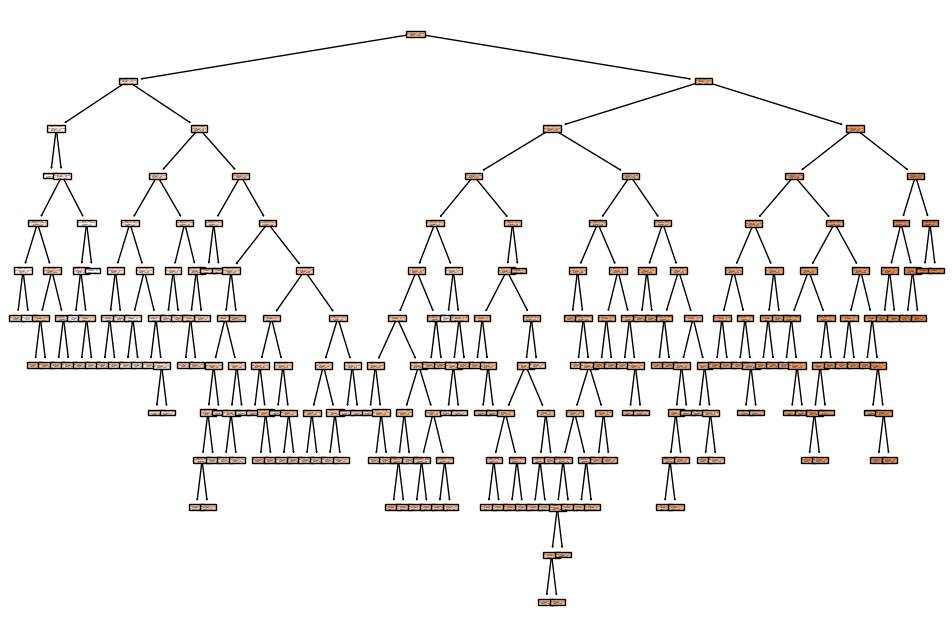

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=dataset.columns.tolist())
plt.show()

# Random Forest Regression

We choose the Random Forest Regression Model based on our previous calculations of each model which deduced that the Random Forest Regression Model had the most accuracy

### Finding The Best n_estimators

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 
# Create a random forest regression model
model = RandomForestRegressor(random_state=0)

# We set the values of n_estimators we'd like to evaluate to reduce error
param_grid = {'n_estimators': [10, 50, 100, 200]}

# We use GridSearchCV as a hyperparamater tuning technique to find the best amount of n_estimators based on RMSE
num_iterations = 5
avg_best_n_estimators = 0

# To help (not completely) against the randomness of the random forest regression model we find the average of the results
for _ in range(num_iterations):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error') 
    grid_search.fit(X_train, y_train)
    avg_best_n_estimators += grid_search.best_params_['n_estimators']

avg_best_n_estimators /= num_iterations
print(f"Average Best n_estimators: {avg_best_n_estimators}")

Average Best n_estimators: 200.0


### Creating The Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
 
# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=int(avg_best_n_estimators))
 
# Fit the Model into the Data
model.fit(X_train, y_train)
 
# Predict the Response for a New Data Point
y_pred = model.predict(X_test)

### Visualize A Single Decision Tree

In [31]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model.estimators_[5]

# Pull out one tree from the forest
tree = model.estimators_[5]

# Export the image to a dot file
feature_list = list((dataset.drop('G3', axis = 1)).columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
graph = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

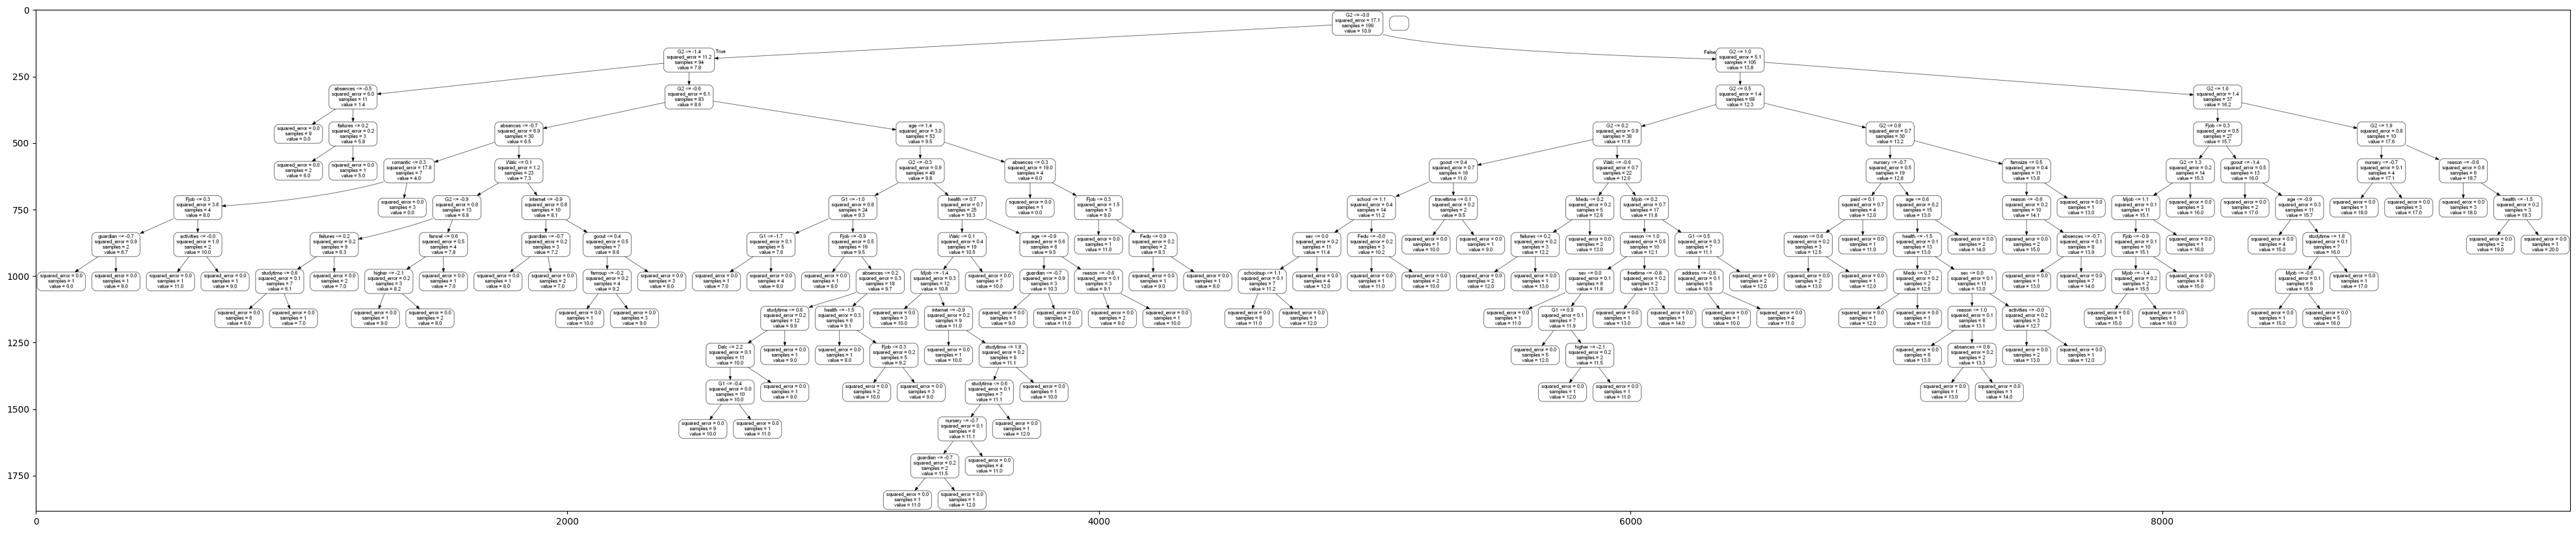

In [32]:
from PIL import Image

img = Image.open('tree.png')
plt.figure(figsize=(120, 10))
plt.imshow(img)

### Evaluating the Model Fit using RMSE, MAE, and MSE

In [33]:
# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.8487
MAE: 1.09
MSE: 3.42


### Test The Predicted Value Using Test Data

In [34]:
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

,y_test,y_pred
0,14,14.220
1,10,11.015
2,9,10.065
3,15,15.820
4,16,15.910


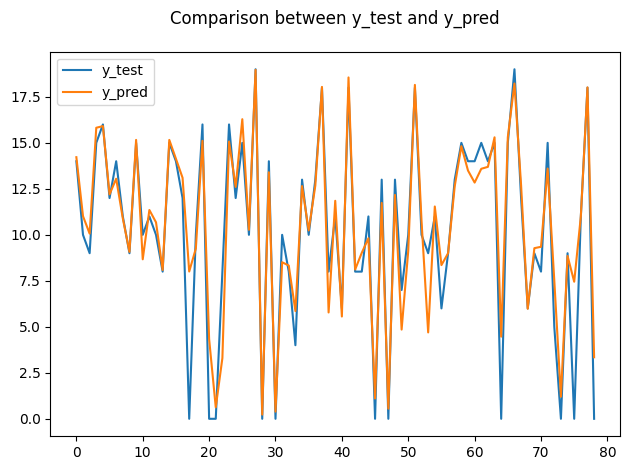

In [35]:
# Visualize the comparison between y_test and y_pred to depict the error margin
evaluate.plot(kind='line')
plt.title('Comparison between y_test and y_pred', pad=20)
plt.tight_layout()
plt.show()

# 5. Model Evaluation

For our Model Evaluation, we can deduce that out of all the models, we can see that the RMSE, MAE, and MSE values for the Random Forest Regression (after fine-tuning and hyperparameter tuning) are the lowest compared to SVM and Decision Tree Regression which means that the Random Forest Regressor model provides the best predictive performance.

### Calculate OOB Score

The OOB Score is a way to estimate the Random Forests performance, the resulting OOB error means that, on average, the predictions made by the random forest model on the out-of-bag samples (samples not used in the construction of the individual trees) have only 12.13% error rate.

In [36]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators=int(avg_best_n_estimators), oob_score=True, random_state=0)
RandomForest.fit(X,y)
print("OOB Error: %0.4f" % (1 - RandomForest.oob_score_))
print("Error Rate: %0.4f" % ((1 - RandomForest.oob_score_) * 100), "%")

OOB Error: 0.1213
Error Rate: 12.1251 %


### Final Prediction

We will predict the final grade of a subject with the following details:
    a female, 
    19 y/o student,
    from Gabriel Pereira,
    living in an urban area,
    with a family of greater than 3 members (including the subject),
    both parents are living together, 
    both parents have higher education, 
    both work in civil services,
    subject's reason of her school decision is its close distance from home,
    subject's main guardian is be her father,
    subject's travel time is be <15 minutes,
    subject's study time is <2 hours,
    0 past class failures,
    no extra educational support,
    no family educational support,
    no extra paid classes,
    joins extra-curricular activities,
    attended nursery school,
    wants to take higher education,
    has internet access at home,
    no romantic relationships,
    decent (3) family relationship,
    very high free amount of free time,
    decent rate of nightouts with friends,
    very low workday alcohol consumption,
    very high weekend alcohol consumption,
    decent (3) health,
    no absences,
    a G1 score of 17,
    and, lastly, a G2 score of 18.

In [37]:
input_data = pd.DataFrame({
    'school': ['GP'],
    'sex': ['F'],
    'age': [19],
    'address': ['U'],
    'famsize': ['GT3'],
    'Pstatus': ['T'],
    'Medu': [4],
    'Fedu': [4],
    'Mjob': ['services'],
    'Fjob': ['services'],
    'reason': ['home'],
    'guardian': ['father'],
    'traveltime': [1],
    'studytime': [1],
    'failure': [0],
    'schoolsup': ['no'],
    'famsup': ['no'],
    'paid': ['no'],
    'activities': ['yes'],
    'nursery': ['yes'],
    'higher': ['yes'],
    'internet': ['yes'],
    'romantic': ['no'],
    'famrel': [3],
    'freetime': [5],
    'goout': [3],
    'Dalc': [1],
    'Walc': [5],
    'health': [3],
    'absences': [0],
    'G1': [17],
    'G2': [18]
})

input_data['school'] = le.fit_transform(input_data['school'].values)
input_data['sex'] = le.fit_transform(input_data['sex'].values)
input_data['address'] = le.fit_transform(input_data['address'].values)
input_data['famsize'] = le.fit_transform(input_data['famsize'].values)
input_data['Pstatus'] = le.fit_transform(input_data['Pstatus'].values)
input_data['Mjob'] = le.fit_transform(input_data['Mjob'].values)
input_data['Fjob'] = le.fit_transform(input_data['Fjob'].values)
input_data['reason'] = le.fit_transform(input_data['reason'].values)
input_data['guardian'] = le.fit_transform(input_data['guardian'].values)
input_data['schoolsup'] = le.fit_transform(input_data['schoolsup'].values)
input_data['famsup'] = le.fit_transform(input_data['famsup'].values)
input_data['paid'] = le.fit_transform(input_data['paid'].values)
input_data['activities'] = le.fit_transform(input_data['activities'].values)
input_data['nursery'] = le.fit_transform(input_data['nursery'].values)
input_data['higher'] = le.fit_transform(input_data['higher'].values)
input_data['internet'] = le.fit_transform(input_data['internet'].values)
input_data['romantic'] = le.fit_transform(input_data['romantic'].values)

final_prediction = model.predict(input_data)
print("Predicted Final Grade: ", final_prediction)

Predicted Final Grade:  [18.655]


c:\Users\hansj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
